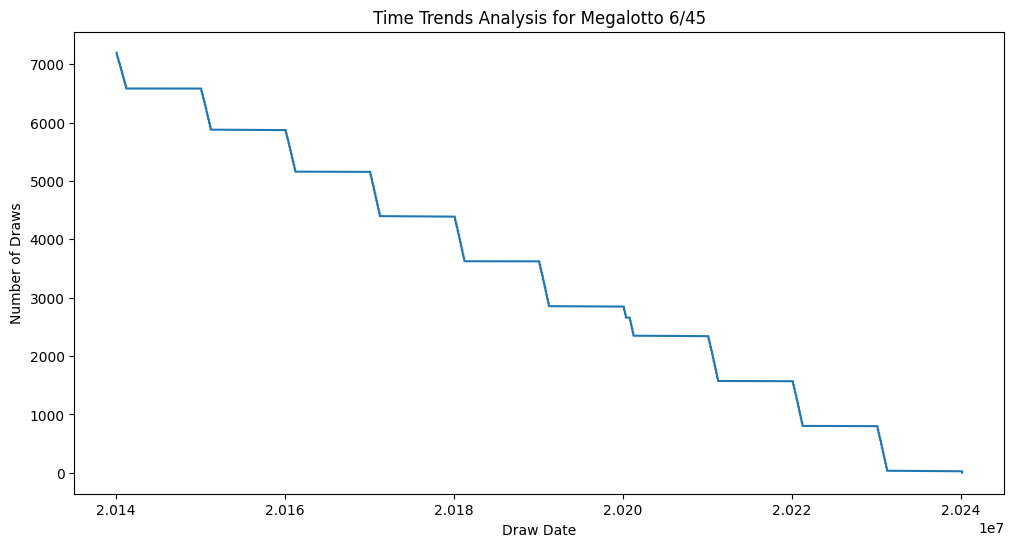

Hot Numbers: [31, 25, 38, 43, 42, 5, 10, 34, 7, 39]
Cold Numbers: [16, 6, 26, 22, 28, 29, 24, 9, 14, 36]


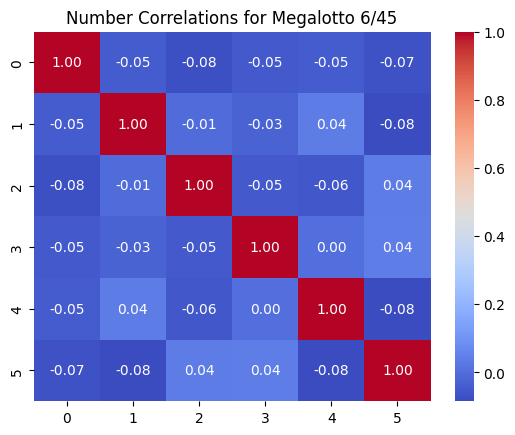

AttributeError: Can only use .dt accessor with datetimelike values

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("lottery_data.csv")

# Convert 'DRAW DATE' to datetime format
df['DRAW DATE'] = pd.to_datetime(df['DRAW DATE'], errors='coerce')

# Check for missing values in 'DRAW DATE' column
df = df.dropna(subset=['DRAW DATE'])

# Extract the numeric representation of the date for modeling
df['DRAW DATE'] = df['DRAW DATE'].dt.strftime('%Y%m%d').astype(int)

# Extract digits from 'COMBINATIONS'
df['COMBINATIONS'] = df['COMBINATIONS'].apply(lambda x: [int(num) for num in x.split('-')])

# Filter data for the "Megalotto 6/45" game
megalotto_6_45 = df[df['LOTTO GAME'] == 'Megalotto 6/45']

# Time Trends Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='DRAW DATE', y=megalotto_6_45.index, data=megalotto_6_45)
plt.title('Time Trends Analysis for Megalotto 6/45')
plt.xlabel('Draw Date')
plt.ylabel('Number of Draws')
plt.show()

# Hot and Cold Numbers
all_numbers = [num for sublist in megalotto_6_45['COMBINATIONS'] for num in sublist]
number_counts = pd.Series(all_numbers).value_counts().reset_index(name='Occurrences')
number_counts = number_counts.sort_values(by='Occurrences', ascending=False)
hot_numbers = number_counts.head(10)['index'].tolist()
cold_numbers = number_counts.tail(10)['index'].tolist()
print(f"Hot Numbers: {hot_numbers}")
print(f"Cold Numbers: {cold_numbers}")

# Number Correlations
number_correlations = megalotto_6_45['COMBINATIONS'].apply(lambda x: pd.Series(x)).corr()
sns.heatmap(number_correlations, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Number Correlations for Megalotto 6/45')
plt.show()

# Day of the Week Analysis
megalotto_6_45['Day_of_Week'] = megalotto_6_45['DRAW DATE'].dt.day_name()
day_of_week_counts = megalotto_6_45['Day_of_Week'].value_counts().reset_index(name='Occurrences')
sns.barplot(x='index', y='Occurrences', data=day_of_week_counts)
plt.title('Day of the Week Analysis for Megalotto 6/45')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Draws')
plt.show()

# Month and Seasonal Patterns
megalotto_6_45['Month'] = megalotto_6_45['DRAW DATE'].dt.month
month_counts = megalotto_6_45['Month'].value_counts().sort_index().reset_index(name='Occurrences')
sns.barplot(x='index', y='Occurrences', data=month_counts)
plt.title('Month Analysis for Megalotto 6/45')
plt.xlabel('Month')
plt.ylabel('Number of Draws')
plt.show()

# Combination Patterns
# This analysis involves looking for specific patterns or sequences in the combinations, which can vary and may not have a universal code.

# Odd/Even and High/Low Analysis
odd_even_counts = megalotto_6_45['COMBINATIONS'].apply(lambda x: 'Odd' if sum(num % 2 == 1 for num in x) > 3 else 'Even')
high_low_counts = megalotto_6_45['COMBINATIONS'].apply(lambda x: 'High' if sum(num > 21 for num in x) > 3 else 'Low')
sns.countplot(x=odd_even_counts, order=['Odd', 'Even'])
plt.title('Odd/Even Analysis for Megalotto 6/45')
plt.xlabel('Odd/Even Distribution')
plt.ylabel('Number of Draws')
plt.show()
sns.countplot(x=high_low_counts, order=['High', 'Low'])
plt.title('High/Low Analysis for Megalotto 6/45')
plt.xlabel('High/Low Distribution')
plt.ylabel('Number of Draws')
plt.show()

# Machine Learning Predictions
# This analysis involves building a machine learning model, and the approach can vary based on the specific prediction task.

# Frequency of Winning Games
games_counts = df['LOTTO GAME'].value_counts().reset_index(name='Occurrences')
sns.barplot(x='index', y='Occurrences', data=games_counts)
plt.title('Frequency of Winning Games')
plt.xlabel('Lotto Game')
plt.ylabel('Number of Wins')
plt.show()

# Combination Similarity
# This analysis involves calculating the similarity or distance between different combinations, which can vary based on the specific similarity measure used.
